In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preliminaries

## Probability basics

Probability is one of **THE most important** knowledge branch that comes up pretty much any domain you want to study. This is because things in the real world is uncertain, and probability is the toolkit to express and study uncertainty!

Unfortunately, probability is also one of the most challenging topic to grasp (at least I get pretty easily confused). But let's try our best. Let's start with the definition of probability for an outcome, when all outcomes are equaly likely.

The probability of an event $E$, $P(E) = \frac{\text{number of outcomes in E}}{\text{number of total possible outcomes}}$ 

For example, for rolling a dice, the probabiltiy of getting a $4$ is $P(E=\text{(outcome = 4)})=\frac{1}{6}$, because there are six possible outcomes in the sample space, $S=\{1,2,3,4,5,6\}$ and $4$ is one of them.

An event can incorporate more than one outcomes, e.g., $P(E=\text{outcome is an odd number}) = \frac{|\{1,3,5\}|}{|\{1,2,3,4,5,6\}|} = \frac{1}{2}$

When the outcomes are not equally likely, probability of an event can be thought of as the *relative* frequency of it happening over <ins> multiple or repeated trial</ins>. According to this definition, the probability of obtaining a $4$ from a dice rolls being $1/6$ means that, roughly, one out of six times you will get a $4$ if you repeatedly roll a dice (for infinite times). Each of these individual rolls are called a "Trial."

But what if the events are not repeatable? For example, what does it mean to say that "the probability of me getting an scholarship this year is $1/4$ or $25%$?" There is only one "this year" (i.e., non repeatable) and the outcomes are not equally probable. In such cases, probablity means the degree of believing that an event will happen.

### Random variable
A Random variable is a function that maps a set of events to a set of real numbers. In other words, a random variable assigns a number to each of the events. The events themselves can be numeric (like rolling a dice yields a numeric outcome) and the mapped values can be the same (i.e., an identity function).

For example, we can define a random variable $X$ which denotes the values of a dice throw. That means $X$ can take any value from $\{1,2,3,4,5,6\}$. In this case, the probability of getting a $4$ can be expressed as $P(X=4)$.

Random variables can map non-numeric values to numbers. For example, a coin toss yields a head or tail, $S=\{H, T\}$. We can define a random variable over this set that takes $1$ if head or $0$ if tail is yielded. Then, $P(X=1) = P(X=0)= 0.5$. 

Why do not we call a random variable a function, when it is in fact a function? I do not know. Probably because of historical reasons. 

Okay, but why do we need random variables in the first place? Because it allows us to assign arbitrary numerical functions to the set of outcomes (or events), and compute the probability of arbitrary numerical values. For example, if we represent dice roll with $X$, we can ask what is the probability that $X<5$, which will translate to the probability of having an outcome between $1$ and $4$. Another example is, say we roll two dice where $X$ and $Y$ represent the outcomes, we can ask what is the probability of having a total of 8, i.e., $P(X+Y=8)$?

### Expected value
Since random variables can take (different) numerical values, the concept of what value it takes *on average* is interesting (and important). The expected value is the arithmetic mean of the possible values a random variable can take, weighted by the probability of those outcomes. In other words, if we repeatedly allow the variable to take values according to the probability of different events, the `expected value` indicates what can we *expect to get* on average.

For example, let's say you play a game where you roll a dice and get a gift money based on what the dice yields. Assume that for $\{1,2,3,4,5,6\}$, you get gift of $\{100, 120, 140, 150, 180, 200\}$ USD. That is the random variable (which is really a function) maps $\{1,2,3,4,5,6\}$ to $\{100, 120, 140, 150, 180, 200\}$. How much can you *expect to get* if you play the game once? This is the mean or expected value.

$E(G) = \frac{1}{6} (100+ 120+ 140 + 150+ 180+ 200) \approx 148$

The general equation of expected value of a random variable $X$ is $E(X) = \sum_i X_i P(X=X_i) = \sum_i x P(X=x)$. Expected value is usually denoted by $\mu$.

### Variance and Standard Deviation

Variance of a random variable $X$ is the same concept as variance of any variable (random or not). Intuitively, it says how different the values that $X$ can take from each other. The more the values *vary* from each other the higher the variance (duh). 
It is measured as the average of squired distances of the values from their mean (confusing, right?). Mathmatically,

$Var(X) = E[(X-E[X])^2]$

Intuitively, it says that, how different the values are from their mean (which implicitly measures how different the values are from each other.

For example, if a random variable is associated with a dice roll but always takes $1$ regardless of what the dice shows, then the expected value is also $1$, and the variance is $0$ since there is no variation. See below that, since the values of $Y$ are farther apart from each other compared to $X$, the variance of $Y$ is larger than the variance of $X$.

In [2]:
x= np.array(range(1,11))
print('x:{}, variance:{}'.format( list(x), np.var(x)))
y= x*10
print('y:{}, variance:{}'.format( list(y), np.var(y)))

x:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], variance:8.25
y:[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], variance:825.0


```{note}
The most important takeaway about variance is that it indicates how different of a value from the expected value you can expect to get.
```
The standard deviation is the squared root of variance: $SD(X) = \sqrt{var(X)}$. STD is usually denoted by $\sigma$.

## Probability distribution 

**Definition:** For $n$ mutually exclusive (i.e., cannot occur together) events $(E_1, E_2,\dots ,E_n)$, if the following conditions hold:

1. $0 \leq P(E_i) \leq 1, \forall i=1,\dots, n$ 
2. $\sum_1^n P(E_i)= 1$
   
then, the set $\{P(E_1), P(E_2), \dots, P(E_n)\}$ is the probability distribution of the event set. I.e., the distribution shows *how the total probabiliy of 1 is distributed across the mutually exclusive events*.

We can think of a probability distribution as a function, that maps the possible events to their probabilities. For example, for a fair coin toss, it maps $\{H, T\}$ to $\{.5,.5\}$. 

Like any other function, a probability distribution function, denoted as $p(X)$ of random varible $X$ can be plotted.

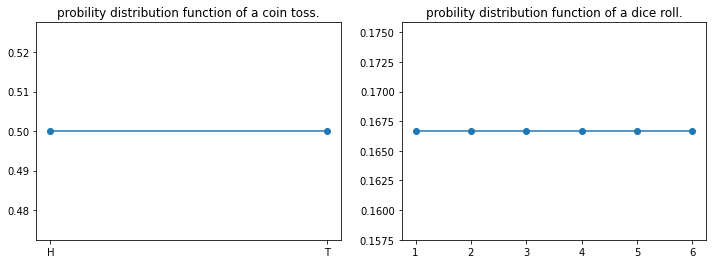

In [3]:
import matplotlib.pyplot as plt, seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].plot(['H', 'T'], [.5,.5], 'o-')
axes[0].set_title('probility distribution function of a coin toss.', fontsize=12)
# plt.show()
axes[1].plot(list(range(1,7)), [1/6]*6, 'o-')
axes[1].set_title('probility distribution function of a dice roll.', fontsize=12)
plt.show()

The functions are parallel to the horizontal axis, because the they are uniform functions (each value has the same probability). We can also have a vertical line (a point function) if only one value has probablity of 1, all else 0 (imagine a coin with both sides head!). These two are extreme examples. Most probability distributions are somewhere in the middle.

#### Random variables and probability distributions
Random variables and probability distributions both are functions, so how are they related? A random variable maps events to numeric values, and a probability distribution maps events to their probabilities. Since values of a random variable have the same probabilities as the associated events, these values have the same probability distribution function. 

For example, if the events of head and tail for a fair coin toss is mapped to 1 and 0, then they have the same probability distribution of $\{.5,.5\}$.

Sampling from a distribution function means that taking values for a random variable according to the distribution function. This idea goes back to the frequncy: if we repeatedly take values from a probability distribution function, the relative frequency will follow the shape of that function. The more we sample, the more closely they will follow that function. Let's see this idea with some popular probability functions.

### Bernoulli distribution
The Bernoulli distribution is the distribution of a binary variable (like a coin toss). The distribution function is:

$f(k; p) = p^k (1-p)^{1-k}, k\in \{0,1\}$

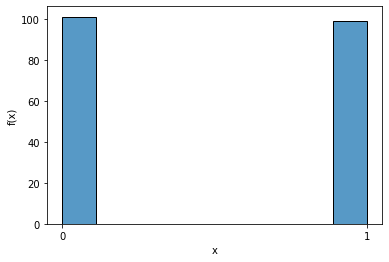

In [4]:
# np.random.binomial(size=3, n=1, p= 0.5)
sns.histplot(x=np.random.binomial(size=200,n=1,p=.5), shrink=1)
plt.xlabel('x')
plt.xticks([0,1])
plt.ylabel('f(x)')
plt.show()

#### Gaussian distribution
The Gaussian, or Normal distribution function has the following equation (with $\mu=0, \sigma=1$):

$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$

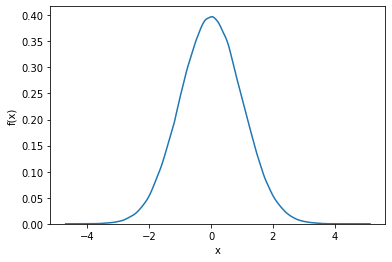

In [5]:
sns.kdeplot(x=np.random.normal(0,1,500000))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Note that, the function has its highest value at $x=0$, which means, the value $0$ has the highest density (or probability) when you sample values from this function. This is no conincidence. Recall that this is the distribution when mean $\mu=0$, and for Gaussian functions, mean has the highest probability. Probabilities for different values decrease as you go farther from the point $0$, and this decrease is symmetric.

The mean can be different than $0$, and the standard deviation can be different than $1$. The general equation for Gaussian distribution is: $f(x; \mu, \sigma) = N(\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2}$

Following are a few examples of different mean. Note that all the curves have the highest density at their respective means.

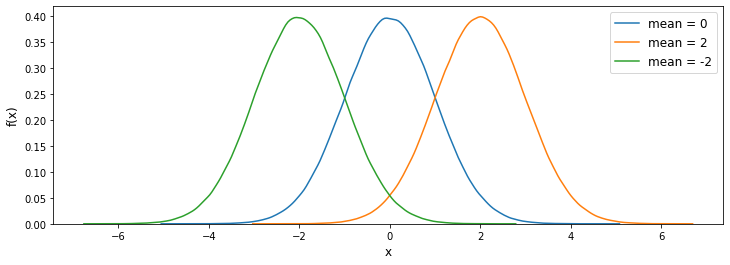

In [6]:
fig, axes=plt.subplots(1, 1, figsize=(12,4))
sns.kdeplot(x=np.random.normal(0,1,1000000), ax=axes, label='mean = 0')
sns.kdeplot(x=np.random.normal(2,1,1000000), ax=axes, label='mean = 2')
sns.kdeplot(x=np.random.normal(-2,1,1000000), ax=axes, label='mean = -2')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)',fontsize=12)
plt.legend(fontsize=12)
plt.show()

Thus, the `mean` decides the location of the curve. Also, `mean` is the value you can <ins> expect to get on average when you sample from this function</ins>. What does the `SD` (or variance) do? It decides how narrow or wide the curve will be. Higher `SD` (equivalently, variance) results in a wider curve. What does that mean? Recall that, variance of a random variable indicates how diverse its values are. Thus, if the values of a random variable are sampled from a Gaussian distribution with a larger variance will yield more diverse values than when sampled from a curve with a smaller variance. Can you explain why by looking at the following plot? (hint: think about the variane of two extreme functions: a uniform function vs. a constant function).

In [ ]:
fig, axes=plt.subplots(1, 1, figsize=(12,4))
sns.kdeplot(x=np.random.normal(0,1,1000000), ax=axes, label='SD = 1')
sns.kdeplot(x=np.random.normal(0,3,1000000), ax=axes, label='SD = 3')
sns.kdeplot(x=np.random.normal(0,5,1000000), ax=axes, label='SD = 5')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)',fontsize=12)
plt.legend(fontsize=12)
plt.show()

Variance is also a measure of "reliability" for mean. It indicates, how accurately the mean or expected value summarizes the whole distribution. Variance of narrower functions are smaller, and so the mean reflects the "average case." The flatter the function, the unreliable the mean is as a representation of the averge case (again, think about a uniform function vs. a constant function).


## Entropy
Another extremely important concept is the entropy of a distribution, which indicates the level of uncertainty associated with a random variable $X$ that follows that distribution. Formally,

$H(X) = - \sum_{x} P(x) \log_2(P(x)) $

```{note}
Intuitively, Entropy represents the uncertainty associated with $X$, or how "surprised" you would be to see a specific value of $X$.
```
The entropy of a binary random variable (fair coin toss) that follows the Bernoulli distribution is: 
$H(X) = - \frac{1}{2} \log_2 \frac{1}{2} - \frac{1}{2} \log_2 \frac{1}{2} = \frac{1}{2}+\frac{1}{2}=1$

If the coin is unfair, say it has a $70%$ instead of $50%$ chance of `Tail`, then: 
$H(X) = - 0.3 \log_2 0.3 - 0.7 \log_2 0.7 = 0.88 < 1$

In the first case, both outcomes are equally likely, and so we are more uncertain about what we will see, wheras in the second case, we know that seeing a Tail is more likely than a head. So the first case has a higher entropy than the second case. Let's look at all possible value a coin toss can have as a probability of showing tail.

In [ ]:
x= np.arange(0.00001,.999999,.001)
e = [(- v * np.log2(v) - (1-v) *np.log2(1-v)) for v in x]
plt.plot(x,e)
plt.xlabel('Probability of getting a tail/head.', fontsize=12)
plt.ylabel('Entropy.',fontsize=12)
plt.xticks(np.arange(0,1.1,.1))
plt.show()

In [ ]:
```{note}
Random variables following the uniform distribution has the highest entropy. 
```

Let's consider now that $X$ represents a (fair) dice roll, which also follows a uniform distribution (all outcomes equally likely): $H(X) = - \sum_{i=1}^6 \frac{1}{6} \log_2 \frac{1}{6} \approx 2.585$.
This is even higher than the entropy of a coin toss, even though both times we had a uniform distribution!

```{note}
The larger the domain of X, the higher the entropy.
```

---
**External resources**

- https://homepages.inf.ed.ac.uk/sgwater/teaching/general/probability.pdf
- https://bookdown.org/kevin_davisross/probsim-book/prob-literacy.html